In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\EDA\\assignment 5\\insurance.csv")
insured=df.copy()

In [3]:
# inspect data, print top 5 
insured.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape

(1338, 7)

In [6]:
# A closer look at the data types present in the data
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Q1. Perform Univariate Analysis on this dataset ?

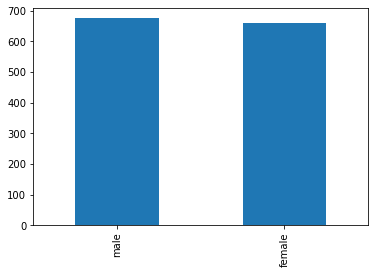

In [7]:
# barplot of sex
df['sex'].value_counts().plot.bar();

 presence of male is slightly higher than female

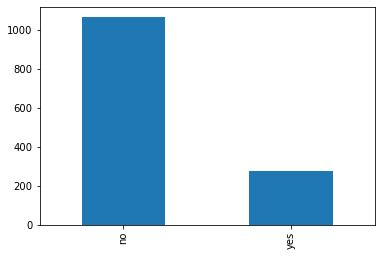

In [8]:
# barplot of smoker
df['smoker'].value_counts().plot.bar();

around 80% of the people are non smokers and rest are smokers

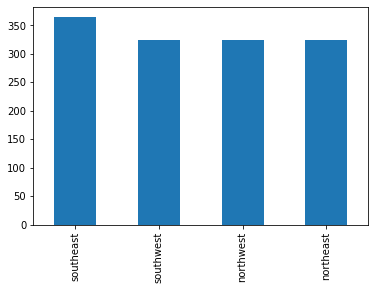

In [9]:
# barplot of region
df['region'].value_counts().plot.bar();

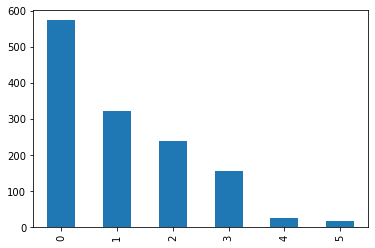

In [10]:
# barplot of children
df['children'].value_counts().plot.bar();

 most of the people have zero children.

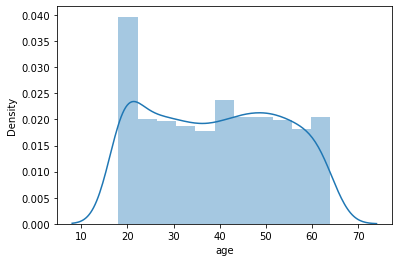

In [11]:
# histogram of age
sns.distplot(insured['age']);

Age distribution looks bimodal with two peeks ocurring at around 21 and around 50

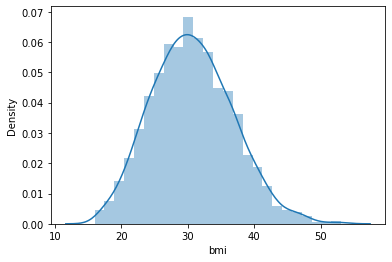

In [12]:
# histogram of bmi
sns.distplot(insured['bmi']);

BMI looks normal with the peak ocurring at 30

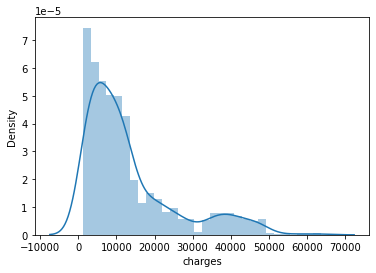

In [13]:
# histogram of charges
sns.distplot(insured['charges']);

Number of people decreases with high charges and it's positively skewed.

### Q2. Plot bivariate Boxplot for every possible combination of features ?

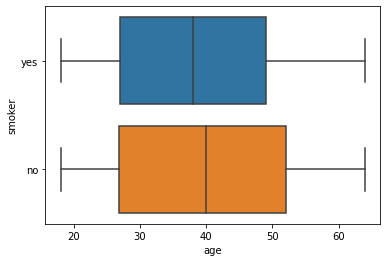

In [14]:
sns.boxplot(x = 'age', y='smoker', data = insured); 

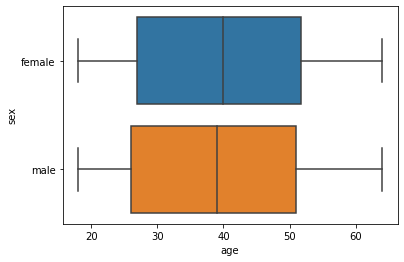

In [15]:
sns.boxplot(x = 'age', y='sex', data = insured);

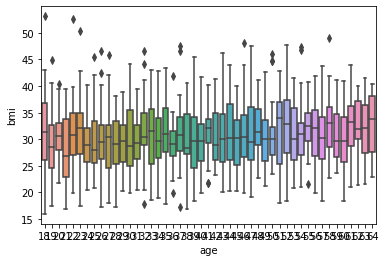

In [16]:
sns.boxplot(x = 'age', y='bmi', data = insured);

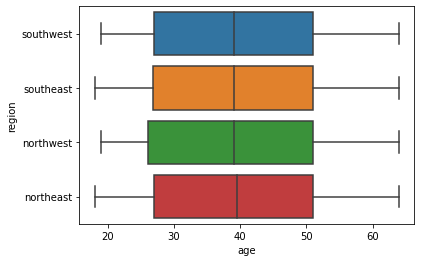

In [17]:
sns.boxplot(x = 'age', y='region', data = insured);

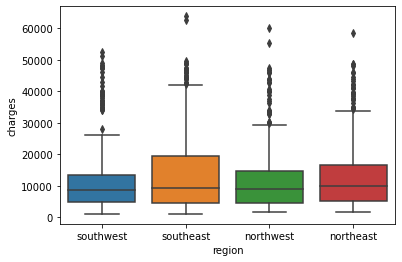

In [18]:
sns.boxplot(x = 'region', y='charges', data = insured);

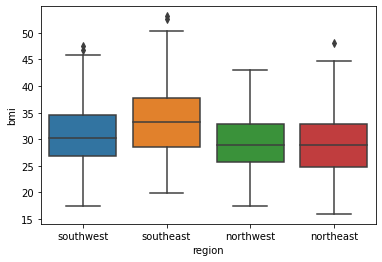

In [19]:
sns.boxplot(x = 'region', y='bmi', data = insured);

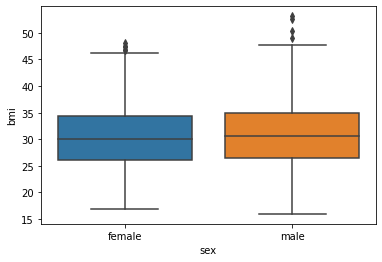

In [20]:
sns.boxplot(x = 'sex', y='bmi', data = insured);

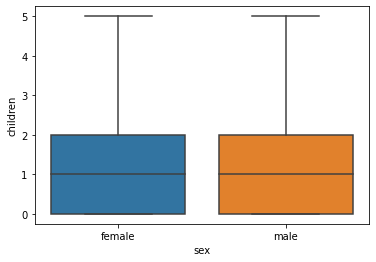

In [21]:
sns.boxplot(x = 'sex', y='children', data = insured);

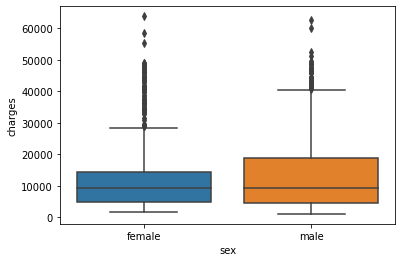

In [22]:
sns.boxplot(x = 'sex', y='charges', data = insured);

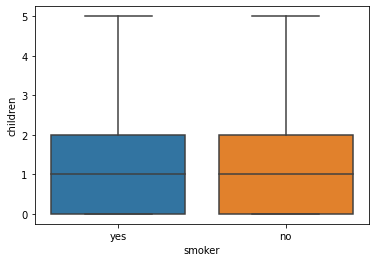

In [23]:
sns.boxplot(x = 'smoker', y='children', data = insured);

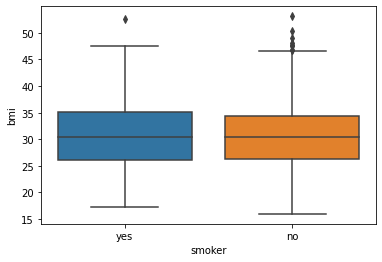

In [24]:
sns.boxplot(x = 'smoker', y='bmi', data = insured);

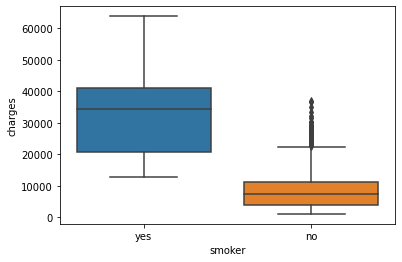

In [25]:
sns.boxplot(x = 'smoker', y='charges', data = insured);

### Q3. Plot bivariate paired plot and differentiate the observed patterns between smoking and non smoking group?

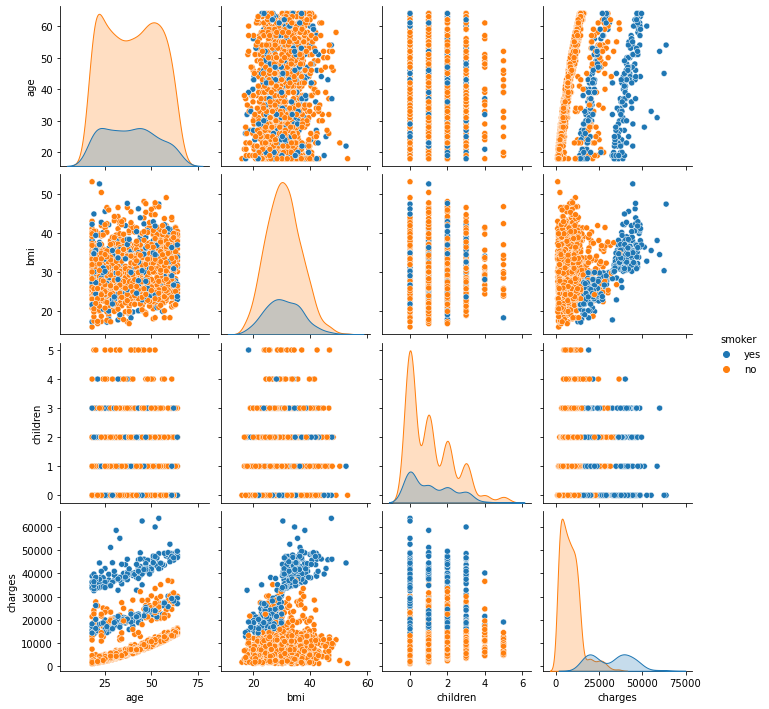

In [26]:
# plotting bivariate paired plot
sns.pairplot(insured, hue='smoker');

### Q4. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

In [28]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [29]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [31]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

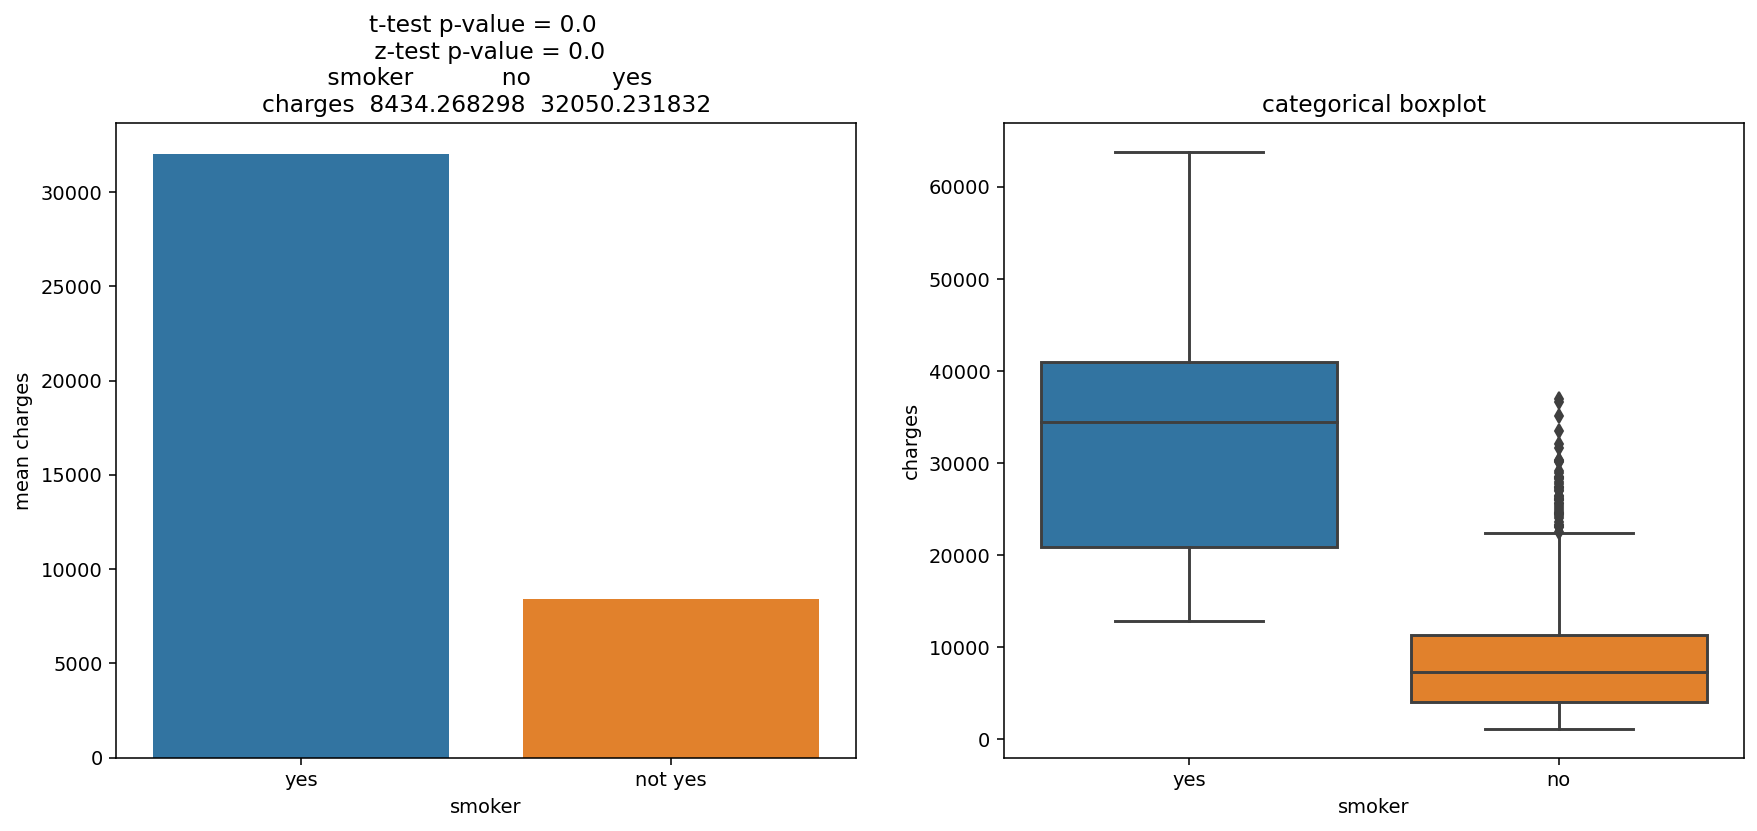

In [34]:
Bivariate_cont_cat(insured, 'charges', 'smoker', 'yes')

Since the p-value is 0 and is less than alpha(0.05), we successfully reject the null hypothesis and accept alterante hypothesis which is H1: mean_charges_smoker > mean_charges_non_smoker

### Q5: Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.?

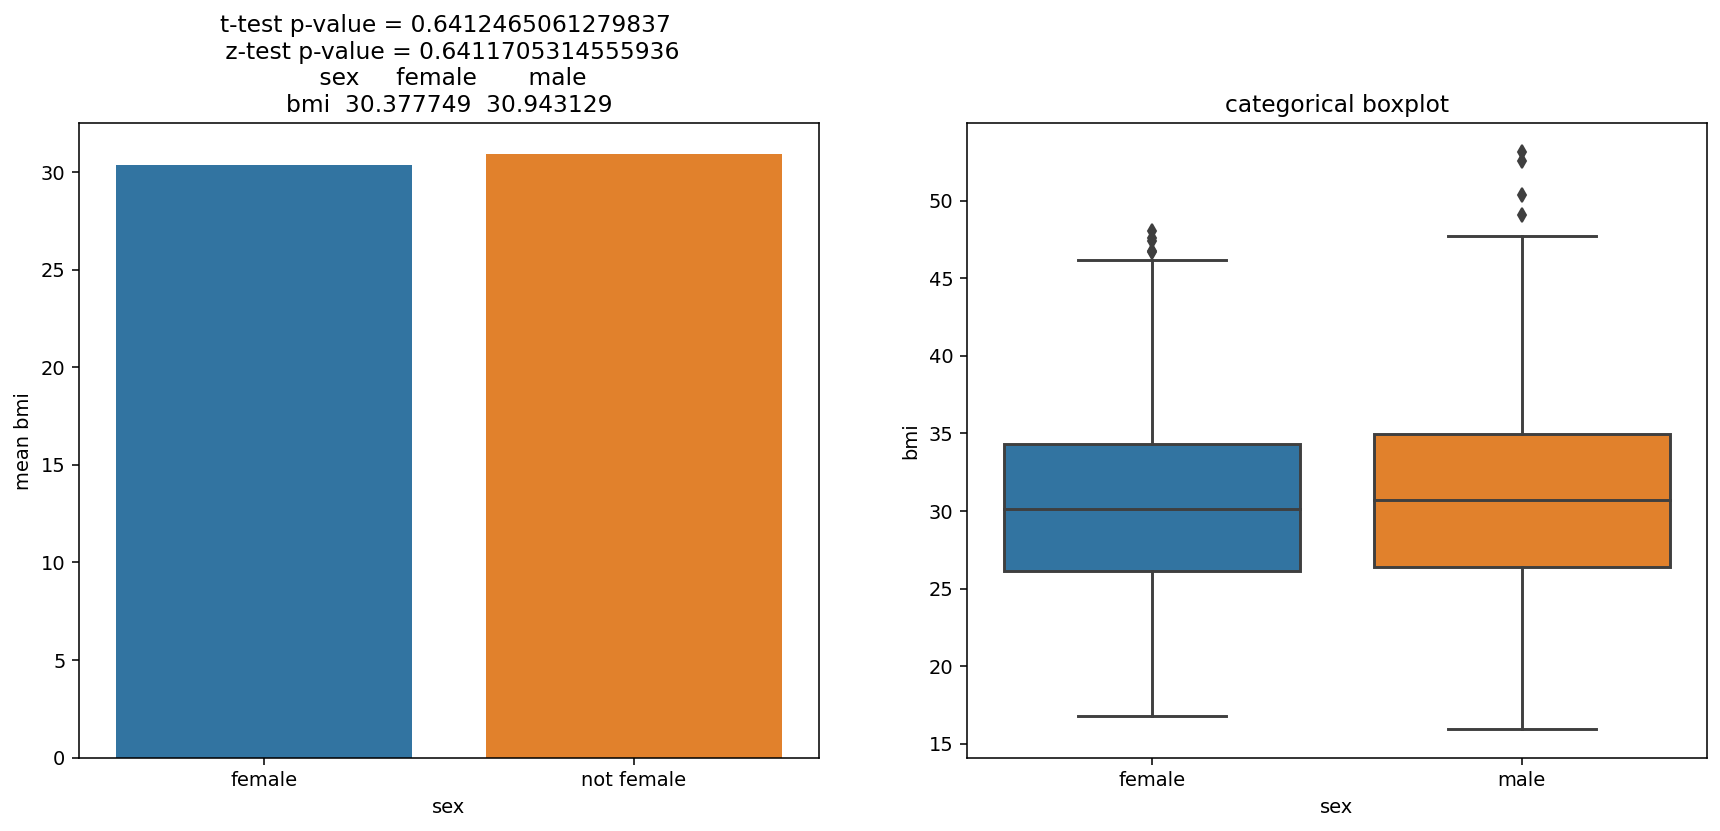

In [35]:
Bivariate_cont_cat(insured, 'bmi', 'sex', 'female')

Since the p-value is greater than the acceptance rate alpha = 0.05, we fail to reject the null hypothesis that the
mean bmi of females is same as that of the mean bmi of males